# ANNEX: B
# US COVID 19 CASES PREDICTION USING NEURAL NETWORK 
## SUBMITTED BY: FAISAL JAVED
### MACHINE LEARNING PROJECT_2 (MS RIME 2020)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## DATA SET DETAILS 
### GATHERING & CLEANING

In [2]:
Data = pd.read_excel("USA Statewise Covid Data.xlsx")   #importing Data from excell file
Data.head()

,Date,Xo,Date_Code,States_Code,Temperatures,Humidity,LandArea,Population_Density,Cases_per_day
0,2020-12-06,1,0,1,11.6,77.1,570641,1.2863,757
1,2020-12-06,1,0,2,46.6,71.6,50645,96.9221,2288
2,2020-12-06,1,0,3,41.3,70.9,52035,58.403,1542
3,2020-12-06,1,0,4,38.0,80.0,77,716,0
4,2020-12-06,1,0,5,43.6,38.5,113594,64.9549,5376


In [3]:
X = Data.drop(['Date','Cases_per_day','LandArea','Xo'],1)

In [4]:
X['Population_Density']= X['Population_Density'].astype(float)

### DATA SCALING

In [5]:
x = X/(X.max(axis=0) + np.spacing(0)) 

In [6]:
x.head()


,Date_Code,States_Code,Temperatures,Humidity,Population_Density
0,0.0,0.017857,0.140097,0.96375,0.000112
1,0.0,0.035714,0.562802,0.89500,0.008402
2,0.0,0.053571,0.498792,0.88625,0.005063
3,0.0,0.071429,0.458937,1.00000,0.062072
4,0.0,0.089286,0.526570,0.48125,0.005631


In [7]:
x.shape

(14840, 5)

### DATA SPLITING & RESHAPING

In [8]:
data_train = round(0.6*len(Data))
data_valid = round(data_train+0.2*len(Data))

In [9]:
train_x = x[:data_train]
valid_x = x[data_train:data_valid]
test_x = x[data_valid:]

In [10]:
train_x = train_x.T
train_x.shape

(5, 8904)

In [11]:
valid_x = valid_x.T
valid_x.shape

(5, 2968)

In [12]:
test_x = test_x.T
test_x.shape

(5, 2968)

In [13]:
Y = Data['Cases_per_day']

In [14]:
train_y = Y[:data_train]
valid_y = Y[data_train:data_valid]
test_y = Y[data_valid:]

In [15]:
train_y = train_y.values.reshape(1,train_x.shape[1]) #Reshaping of y coloumn for ease of mathematical multiplication
train_y.shape

(1, 8904)

In [16]:
valid_y = valid_y.values.reshape(1,valid_x.shape[1])
valid_y.shape

(1, 2968)

In [17]:
test_y = test_y.values.reshape(1,test_x.shape[1])
test_y.shape

(1, 2968)

## DEFINING FUNCTIONS

### LAYER STRUCTURE

In [18]:
def layer_size (train_x,train_y):                      #Making Struture of neural networks
    x_node = train_x.shape[0] #Size of the input layer 
    h1 = 16 #size of first hidden layer
    h2 = 16 #size of second hidden layer
    y_node = train_y.shape[0] #Size of the input layer 
    return (x_node,h1,h2,y_node)

In [19]:
(x_node, h1,h2, y_node) = layer_size(train_x, train_y)
print("The size of the input layer is: x_node = " + str(x_node))
print("The size of the first hidden layer is: h1 = " + str(h1))
print("The size of the second hidden layer is: h2 = " + str(h2))
print("The size of the output layer is: y_node = " + str(y_node))

The size of the input layer is: x_node = 5
The size of the first hidden layer is: h1 = 16
The size of the second hidden layer is: h2 = 16
The size of the output layer is: y_node = 1


### INITIALIZE PARAMETERS

In [20]:
# Initializing Model Parameters
def init_parameters(x_node,h1,h2,y_node):
    np.random.seed(2) # set up a seed so that output matches remains same although the initialization is random.
    W1 = np.random.randn(h1,x_node)*0.01
    b1 = np.zeros((h1,1))
    W2 = np.random.randn(h2,h1)*0.01
    b2 = np.zeros((h2,1))
    W3 = np.random.randn(y_node,h2)*0.01
    b3 = np.zeros((y_node,1))
    
    #checking dimensions of the parameters 
    assert (W1.shape == (h1, x_node))
    assert (b1.shape == (h1, 1))
    assert (W2.shape == (h2, h1))
    assert (b2.shape == (h2, 1))
    assert (W3.shape == (y_node, h2))
    assert (b3.shape == (y_node, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    return parameters
    

In [21]:
parameters = init_parameters(x_node, h1,h2, y_node)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("W3 = " + str(parameters["W3"]))
print("b3 = " + str(parameters["b3"]))

W1 = [[-4.16757847e-03 -5.62668272e-04 -2.13619610e-02  1.64027081e-02
  -1.79343559e-02]
 [-8.41747366e-03  5.02881417e-03 -1.24528809e-02 -1.05795222e-02
  -9.09007615e-03]
 [ 5.51454045e-03  2.29220801e-02  4.15393930e-04 -1.11792545e-02
   5.39058321e-03]
 [-5.96159700e-03 -1.91304965e-04  1.17500122e-02 -7.47870949e-03
   9.02525097e-05]
 [-8.78107893e-03 -1.56434170e-03  2.56570452e-03 -9.88779049e-03
  -3.38821966e-03]
 [-2.36184031e-03 -6.37655012e-03 -1.18761229e-02 -1.42121723e-02
  -1.53495196e-03]
 [-2.69056960e-03  2.23136679e-02 -2.43476758e-02  1.12726505e-03
   3.70444537e-03]
 [ 1.35963386e-02  5.01857207e-03 -8.44213704e-03  9.76147160e-08
   5.42352572e-03]
 [-3.13508197e-03  7.71011738e-03 -1.86809065e-02  1.73118467e-02
   1.46767801e-02]
 [-3.35677339e-03  6.11340780e-03  4.79705919e-04 -8.29135289e-03
   8.77102184e-04]
 [ 1.00036589e-02 -3.81092518e-03 -3.75669423e-03 -7.44707629e-04
   4.33496330e-03]
 [ 1.27837923e-02 -6.34679305e-03  5.08396243e-03  2.1611600

### SIGMOID FUNCTION

In [22]:
def sigmoid(z):   #Defining Sigmoid funcion
        return 1.0/(1.0+np.exp(-z))

### FORWARD PROPAGATION

In [23]:
def forward_propagation(train_x, parameters):
    # train_x = input data of size (n_x, m)
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    Z1 = np.dot(W1,train_x) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    Z3=  np.dot(W3,A2) + b3
    A3=  Z3
    
    assert(A3.shape == (1, train_x.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2,
             "Z3": Z3,
             "A3": A3
            }
    
    return A3, cache

In [24]:
A3, cache = forward_propagation(train_x, parameters)
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']),np.mean(cache['Z3']),np.mean(cache['A3']))

-0.003994970582607928 0.4990012894849557 -0.0013992105100661234 0.49965017556176333 0.03515200426229805 0.03515200426229805


### COST FUNCTION

In [25]:
def compute_cost(A3, train_y, parameters,lambda_):   #Defining Cost Function 
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    m = train_y.shape[1]
    regularisation = lambda_*np.sum(np.power(W1,2))+lambda_*np.sum(np.power(W2,2)) +lambda_*np.sum(np.power(W3,2)) 
    cost=(np.sum(np.power((A3-train_y),2)) + regularisation) /(2*m)
    cost = np.squeeze(cost)
    assert(isinstance(cost, float))
    return cost
          

### BACKWARD PROPAGATION

In [26]:
def backward_propagation(parameters, cache, train_x, train_y,lambda_):
    m = train_x.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    A3 = cache["A3"]
    
    dZ3 = A3-train_y
    dW3 = 1/m*(np.dot(dZ3,A2.T)) + (lambda_*W3)/m
    db3 = 1/m*(np.sum(dZ3,axis=1, keepdims=True))
    dZ2 = np.multiply(np.dot(W3.T,dZ3),(A2*(1-A2)))
    dW2 = 1/m*(np.dot(dZ2,A1.T)) + (lambda_*W2)/m
    db2 = 1/m*(np.sum(dZ2,axis=1, keepdims=True))
    dZ1 = np.multiply(np.dot(W2.T,dZ2),(A1*(1-A1)))
    dW1 = 1/m*(np.dot(dZ1,train_x.T)) + (lambda_*W1)/m
    db1 = 1/m*(np.sum(dZ1,axis=1, keepdims=True))
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2,
             "dW3": dW3,
             "db3": db3}
    return grads
    

In [27]:
grads = backward_propagation(parameters, cache, train_x, train_y,lambda_=10)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))
print ("dW3 = "+ str(grads["dW3"]))
print ("db3 = "+ str(grads["db3"]))

dW1 = [[ 9.11306313e-03  1.95819937e-02  2.76973797e-02  3.39856785e-02
   7.87516700e-04]
 [ 5.21164858e-03  1.12196316e-02  1.58603453e-02  1.94392426e-02
   4.52289972e-04]
 [ 3.40649513e-03  7.32864162e-03  1.03386283e-02  1.26548739e-02
   3.07257510e-04]
 [-1.04802208e-02 -2.24945848e-02 -3.18301329e-02 -3.90262529e-02
  -9.27653068e-04]
 [-1.56305339e-03 -3.33761558e-03 -4.71940161e-03 -5.79735650e-03
  -1.41388816e-04]
 [ 2.84872288e-03  6.11691942e-03  8.65600508e-03  1.06067281e-02
   2.50859742e-04]
 [ 2.91941490e-03  6.30184647e-03  8.85800576e-03  1.08886049e-02
   2.63035565e-04]
 [-1.38850593e-03 -3.00930706e-03 -4.27747221e-03 -5.22960057e-03
  -1.18256675e-04]
 [ 3.13798961e-03  6.75571861e-03  9.53032175e-03  1.17226725e-02
   2.94757946e-04]
 [ 1.14919811e-03  2.48315123e-03  3.50598642e-03  4.28594104e-03
   1.03116159e-04]
 [ 2.09853830e-04  4.22297936e-04  5.99651645e-04  7.39089354e-04
   2.24623025e-05]
 [ 3.69903320e-03  7.90666912e-03  1.12085235e-02  1.372934

### UPDATING PARAMETERS

In [28]:
def update_parameters(parameters, grads, learning_rate = 0.01):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    dW3 = grads["dW3"]
    db3 = grads["db3"]
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    W3 = W3 - learning_rate*dW3
    b3 = b3 - learning_rate*db3
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters
    

In [29]:
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("W3 = " + str(parameters["W3"]))
print("b3 = " + str(parameters["b3"]))

W1 = [[-4.25870911e-03 -7.58488209e-04 -2.16389348e-02  1.60628513e-02
  -1.79422310e-02]
 [-8.46959014e-03  4.91661786e-03 -1.26114843e-02 -1.07739146e-02
  -9.09459905e-03]
 [ 5.48047549e-03  2.28487937e-02  3.12007647e-04 -1.13058032e-02
   5.38751063e-03]
 [-5.85679479e-03  3.36408831e-05  1.20683135e-02 -7.08844696e-03
   9.95290404e-05]
 [-8.76544840e-03 -1.53096555e-03  2.61289854e-03 -9.82981692e-03
  -3.38680577e-03]
 [-2.39032754e-03 -6.43771932e-03 -1.19626829e-02 -1.43182396e-02
  -1.53746055e-03]
 [-2.71976375e-03  2.22506494e-02 -2.44362558e-02  1.01837900e-03
   3.70181501e-03]
 [ 1.36102237e-02  5.04866514e-03 -8.39936232e-03  5.23936204e-05
   5.42470829e-03]
 [-3.16646187e-03  7.64256019e-03 -1.87762098e-02  1.71946199e-02
   1.46738325e-02]
 [-3.36826537e-03  6.08857628e-03  4.44646054e-04 -8.33421230e-03
   8.76071022e-04]
 [ 1.00015603e-02 -3.81514815e-03 -3.76269075e-03 -7.52098522e-04
   4.33473868e-03]
 [ 1.27468020e-02 -6.42585974e-03  4.97187719e-03  2.0238665

### NEURAL NETWORK IMPLEMENTATION

In [30]:
def neural_network_model(train_x, train_y, h1,h2,num_iterations = 10000, lambda_=10, print_cost=False):
    np.random.seed(3)
    x_node = layer_size(train_x, train_y)[0]
    y_node = layer_size(train_x, train_y)[3]
    cost_history=[]
    cost_valid_history=[]
    cost_test_history=[]
    
    parameters = init_parameters(x_node,h1,h2, y_node)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    for i in range(0, num_iterations):
        A3, cache = forward_propagation(train_x, parameters)
        
        cost = compute_cost(A3,train_y,parameters,lambda_)
        
        cost_history.append(cost)
        
        grads = backward_propagation(parameters,cache,train_x,train_y,lambda_)
        
        parameters = update_parameters(parameters,grads)
        
      # Computing cost of Validation Data 
        A31, cache1 = forward_propagation(valid_x, parameters)
        
        cost_valid = compute_cost(A31,valid_y,parameters,lambda_)
        
        cost_valid_history.append(cost_valid)
        
       # Computing Cost of Test data 
        A32, cache2 = forward_propagation(test_x, parameters)
        
        cost_test = compute_cost(A32,test_y,parameters,lambda_)
        
        cost_test_history.append(cost_test)
        
        
        if print_cost and i%999 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
        if print_cost and i%999 == 0:
            print ("Cross Validated Cost after iteration %i: %f" %(i, cost_valid))
            
        if print_cost and i%999 == 0:
            print ("Test Cost after iteration %i: %f" %(i, cost_test))
            
       # Plotting Training Data Cost, Cross Validated cost & Training Cost     

    fig,(ax1)=plt.subplots(figsize=(10,5),
                          nrows=1,
                          ncols=1)
    ax1.scatter(x=list(range(0,num_iterations)),y=cost_history,color='red',label='Training Cost')
    ax1.scatter(x=list(range(0,num_iterations)),y=cost_valid_history,color='green',label='Cross Validation Cost')
    ax1.scatter(x=list(range(0,num_iterations)),y=cost_test_history,color='blue',label='Test Cost')
    plt.xlabel('Parameters')
    plt.ylabel('Cost')
    plt.title('Visualisation of Cost Function')
    plt.legend()
    plt.show()
    
    return parameters,cost,cost_valid,cost_test

Cost after iteration 0: 3166716.315130
Cross Validated Cost after iteration 0: 390293.957735
Test Cost after iteration 0: 590420.667659
Cost after iteration 999: 2272238.243276
Cross Validated Cost after iteration 999: 710530.406018
Test Cost after iteration 999: 936491.580946


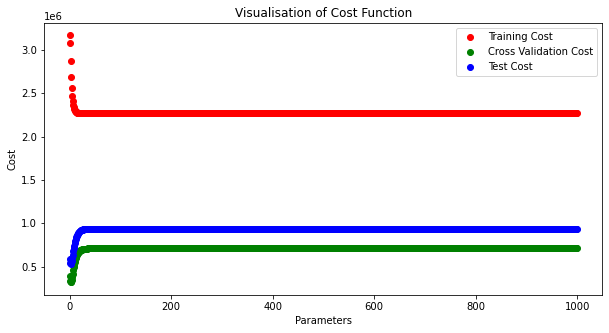

W1 = [[ 0.1005317   0.22764016  0.30283889  0.41307084 -0.00878571]
 [ 0.10726795  0.25702785  0.34551263  0.42787668  0.00089543]
 [ 0.14617458  0.32950514  0.43602154  0.52256502  0.01736305]
 [ 0.11533403  0.26414214  0.38688043  0.45229581  0.01045548]
 [ 0.20062603  0.45484786  0.65046201  0.78392557  0.01454719]
 [ 0.15400612  0.33459909  0.4722262   0.5788094   0.01185078]
 [ 0.18565756  0.4327009   0.55887736  0.71523139  0.01976579]
 [ 0.16175869  0.32835734  0.45076296  0.56240652  0.01804493]
 [ 0.11018652  0.2546402   0.33221024  0.44669934  0.02419948]
 [ 0.14727005  0.33440278  0.46662971  0.5628373   0.01374376]
 [ 0.14364158  0.28786791  0.41031109  0.50644076  0.01572308]
 [ 0.10829913  0.20230712  0.30114344  0.36487727 -0.01019915]
 [ 0.13168729  0.29487298  0.42008656  0.5183047  -0.00856066]
 [ 0.18271912  0.3907151   0.54996245  0.69632152  0.02285575]
 [ 0.07096658  0.17716009  0.23590965  0.29426549 -0.0042446 ]
 [ 0.05748074  0.06487184  0.12852868  0.16542658 

In [31]:
parameters,J,J_cv,J_t = neural_network_model(train_x, train_y, 16,16, num_iterations=1000, lambda_= 10, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("W3 = " + str(parameters["W3"]))
print("b3 = " + str(parameters["b3"]))

### ERROR ON CROSS VALIDATION DATA

In [32]:
y_2, cache1 = forward_propagation(valid_x, parameters)  #y_2 = predicted cases on cross validation data


In [33]:
y_2.shape

(1, 2968)

In [34]:
### ERROR ON VALID DATA
def RMSE(y_2, valid_y):
    return np.sqrt((y_2 - valid_y) ** 2).mean()
rmse_val = RMSE(np.array(y_2), np.array(valid_y))
print(f" Rms error is:  {rmse_val}")

 Rms error is:  1074.7391607398674


In [35]:
def MSE(y_2, valid_y):
    return (1/len(valid_x))*np.sum((y_2 - valid_y) ** 2)
mse_val = MSE(np.array(y_2), np.array(valid_y))
print(f" Mean Square Error is:  {mse_val}")

 Mean Square Error is:  843291894.64437


### PLOTTING PREDICTED CASES VS CROSS VALIDATED CASES

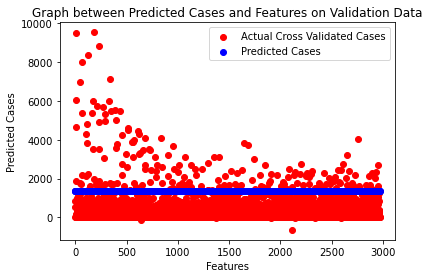

In [36]:
### PLOTTING VALID DATA POINTS 
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, len(valid_x.T))),y= valid_y, color='red',label='Actual Cross Validated Cases')         
plt.scatter(x=list(range(0, len(valid_x.T))), y=y_2, color='blue', label='Predicted Cases')
plt.xlabel('Features')
plt.ylabel('Predicted Cases')
plt.title('Graph between Predicted Cases and Features on Validation Data')
plt.legend()
plt.show()

### ERROR ON TEST DATA

In [37]:
y_3, cache1 = forward_propagation(test_x, parameters) #y_3 = predicted cases on test data

In [38]:
y_3.shape

(1, 2968)

In [39]:
### ERROR ON TEST DATA
def RMSE(y_3, test_y):
    return np.sqrt((y_3 - test_y) ** 2).mean()
rmse_val = RMSE(np.array(y_3), np.array(test_y))
print(f" Rms error is:  {rmse_val}")

 Rms error is:  1170.025373203566


In [40]:
def MSE(y_3, valid_y):
    return (1/len(valid_x))*np.sum((y_3 - valid_y) ** 2)
mse_val = MSE(np.array(y_3), np.array(valid_y))
print(f" Mean Square Error is:  {mse_val}")

 Mean Square Error is:  843291894.64437


### PLOTTING PREDICTED CASES VS TEST CASES

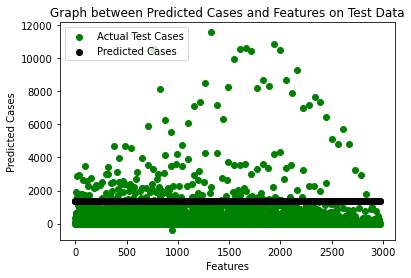

In [41]:
### PLOTTING TEST DATA POINTS 
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, len(test_x.T))),y= test_y, color='green',label='Actual Test Cases')         
plt.scatter(x=list(range(0, len(test_x.T))), y=y_3, color='black', label='Predicted Cases')
plt.xlabel('Features')
plt.ylabel('Predicted Cases')
plt.title('Graph between Predicted Cases and Features on Test Data')
plt.legend()
plt.show()